<h1 style="text-align: center;" markdown="1">Predicting Power Output in Large-Scale Wave Energy Farms</h1> 
<h2 style="text-align: center;" markdown="2">Optimisation of large wave farms using a multi strategy evolutionary framework</h2>
<h3 style="text-align: center;" markdown="3">Kevin Obote (ADM: 190696)</h3>

## Introduction

### Background
Wave energy is a rapidly advancing renewable energy source that harnesses the power of ocean waves to generate electricity. It holds great promise in addressing global challenges such as climate change and energy security. However, optimizing the energy output in large wave farms is a complex problem. The hydrodynamic interactions between wave energy converters (WECs) make calculations computationally expensive and challenging. As such, developing efficient and accurate models to predict the power output of wave farms is crucial for the advancement of this technology.

### Research Problem
The primary research problem addressed in this project is the optimization of energy output in large-scale wave farms. The dataset used in this study consists of configurations involving 49 and 100 WECs, along with their power outputs and related variables. The challenge lies in accurately predicting the total power output of the wave farm based on these configurations. This requires overcoming the computational difficulties associated with the interactions between multiple WECs, which impact the overall efficiency of the wave farm.

### Objectives
1. **Develop a Predictive Model**: Create a machine learning model to accurately estimate the total power output of large-scale wave farms based on WEC configurations.
2. **Analyze Key Features**: Identify and analyze the most significant features that influence the power output of wave farms.
3. **Optimize Model Performance**: Implement various machine learning techniques and evaluate their performance to ensure the model's accuracy and efficiency.

### Hypothesis
1. **WEC Configuration Impact**: The configuration of WECs significantly impacts the total power output of a wave farm.
2. **Machine Learning Efficiency**: A well-trained machine learning model can accurately predict the power output of a wave farm, reducing the need for complex hydrodynamic calculations.

## Methodology, Results and Discussion

### Data Description
The dataset used in this project was created to develop a surrogate model for predicting the total power output of large wave farms. It contains 63,600 instances and 149 features, covering 49 and 100 WEC configurations under Perth and Sydney wave scenarios.

#### Source of Data
- **Creators**: Mehdi Neshat, Bradley Alexander, Nataliia Sergiienko, Markus Wagner
- **Published**: 2023
- **License**: Creative Commons Attribution 4.0 International (CC BY 4.0)
- **DOI**: [10.24432/C5GG7Q](https://doi.org/10.24432/C5GG7Q)

#### Period Collected
- **Year and Month/Day**: Data was donated on September 16, 2023.

#### How it was Collected
The dataset was derived from a study published at the GECCO conference, which used a multi-strategy evolutionary framework to optimize large wave farms.

#### Under What Conditions it was Collected
The data collection involved extensive simulations using the Phoenix HPC service at the University of Adelaide to account for hydrodynamic interactions between WECs.

#### Variables
| Variable Name | Role    | Type    | Description                              | Units | Missing Values |
| ------------- | ------- | ------- | ---------------------------------------- | ----- | --------------- |
| X1            | Feature | Integer | X-coordinate of the 1st WEC              | -     | No              |
| Y1            | Feature | Integer | Y-coordinate of the 1st WEC              | -     | No              |
| ...           | ...     | ...     | ...                                      | ...   | ...             |
| Xn            | Feature | Integer | X-coordinate of the nth WEC              | -     | No              |
| Yn            | Feature | Integer | Y-coordinate of the nth WEC              | -     | No              |
| Power         | Target  | Real    | Total power output of the wave farm      | kW    | No              |
| Q-factor      | Feature | Real    | Hydrodynamic interaction factor          | -     | No              |

## Step 1 : Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score, mean_squared_error



# Step 2: Load the dataset and dipaly information about the datasets

In [2]:
# Load the datasets
perth_49 = pd.read_csv('WEC_Perth_49.csv')
perth_100 = pd.read_csv('WEC_Perth_100.csv')
sydney_49 = pd.read_csv('WEC_Sydney_49.csv')
sydney_100 = pd.read_csv('WEC_Sydney_100.csv')


In [3]:
# Display the top 5 rows of the perth_49

perth_49.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [4]:
# Display the top 5 rows of the sydeny_49

sydney_49.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,1.0,1.0,0.00,70.00,1.00,140.0,50.00,198.0,401.0,1.0,...,71909.82,70674.49,70972.33,90957.03,90903.63,87876.82,79499.23,68880.39,0.78,4065416.61
1,598.0,0.0,595.82,77.69,593.70,150.0,549.00,198.0,798.0,0.0,...,68757.68,70665.50,69963.48,84511.25,85691.70,85211.51,76678.20,76119.53,0.76,3951216.37
2,198.0,0.0,197.46,75.19,192.94,150.0,87.64,198.0,398.0,0.0,...,73675.80,77808.44,73519.82,91436.35,88770.60,86632.78,77932.46,69343.12,0.78,4022640.78
3,598.0,0.0,596.97,69.41,592.69,143.8,549.00,198.0,398.0,200.0,...,68947.21,71668.05,69380.67,85191.27,84453.12,85300.41,78573.25,72527.16,0.75,3879223.41
4,198.0,0.0,197.18,79.83,192.97,150.0,89.53,198.0,398.0,0.0,...,78367.97,79075.06,74354.03,85254.75,86978.69,86951.65,77671.87,74901.38,0.77,3974691.24


In [5]:
# Display the top 5 rows of the perth_100

perth_100.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1000.0,0.0,946.08,37.42,889.67,74.76,832.02,112.10,1250.0,1.0,...,98711.68,102872.82,100743.44,99259.87,98909.46,101388.37,101025.35,98676.66,0.75,7257985.04
1,800.0,0.0,746.04,37.38,689.81,74.79,632.43,111.97,1200.0,0.0,...,96351.38,102253.02,101744.20,99482.45,99304.59,101953.23,100878.42,99508.49,0.74,7103374.61
2,600.0,0.0,545.98,37.50,489.87,74.95,432.52,112.15,650.0,0.0,...,96985.29,102472.80,101757.63,99429.45,98709.14,101312.44,100979.86,99024.16,0.76,7335380.64
3,600.0,0.0,546.09,37.41,489.70,74.76,432.35,111.90,800.0,0.0,...,76823.85,88005.41,98779.92,100260.30,98744.25,101144.58,100835.43,98915.38,0.75,7187769.87
4,600.0,0.0,545.95,37.52,489.69,74.99,432.46,112.16,800.0,0.0,...,98195.95,102874.16,100256.15,99221.12,98969.54,101389.77,100924.02,98796.00,0.75,7260222.61


In [6]:
# Display the top 5 rows of the sydeny_100

sydney_100.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,74018.52,71727.79,67966.45,63101.26,88826.02,86531.44,83786.68,73514.19,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,...,63702.46,67776.99,65133.52,63138.74,82852.91,83519.30,81973.65,71781.34,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,...,55788.34,59593.98,60073.60,59198.12,63377.08,72078.85,77435.62,67457.26,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,66961.48,65716.93,66637.89,62562.54,80858.08,82656.53,82171.28,71713.30,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,...,51814.27,59556.86,68341.92,70731.90,64192.86,69757.10,75581.40,69741.63,0.65,6925096.49


In [7]:
# Display information about the datasets
# Function to display information about a wec
def wec_info(df, name):
    print(f"\nInformation for {name}")
    print("-" * 40)
    print(df.info())
    print("\nShape:", df.shape)
    print("\nStatistical Summary:")
    print(df.describe())
    print("\nFirst few rows:")
    print(df.head())

wec_info(perth_49, "WEC Perth 49")


Information for WEC Perth 49
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB
None

Shape: (36043, 149)

Statistical Summary:
                 X1            Y1            X2            Y2            X3  \
count  36043.000000  36043.000000  36043.000000  36043.000000  36043.000000   
mean     366.597060     18.709550    426.314033     51.085762    477.295590   
std      307.911246     44.043295    265.781316     90.151852    270.322011   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       65.770000      0.000000    200.000000      0.000000    289.950000   
50%      250.000000      0.000000    346.090000     37.520000    400.000000   
75%      600.000000      0.000000    745.980000     37.900000    689.800000   
max     1000.000000    885.590000   1000.000000    939.260000   1000.000000   

          

In [8]:
wec_info(sydney_49, "WEC Sydney 49")


Information for WEC Sydney 49
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 20.4 MB
None

Shape: (17964, 149)

Statistical Summary:
                 X1            Y1            X2            Y2            X3  \
count  17964.000000  17964.000000  17964.000000  17964.000000  17964.000000   
mean     138.863588      3.718730    142.885799     66.752149    148.172411   
std      167.910813     28.398116    166.600732     26.712075    166.469037   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000     51.000000      1.000000   
50%      198.000000      0.000000    195.960000     70.000000    192.360000   
75%      198.000000      1.000000    197.110000     75.650000    193.700000   
max     1000.000000    988.260000   1000.000000    989.650000   1000.000000   

         

In [9]:
wec_info(perth_100, "WEC Perth 100")



Information for WEC Perth 100
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7277 entries, 0 to 7276
Columns: 302 entries, X1 to Total_Power
dtypes: float64(302)
memory usage: 16.8 MB
None

Shape: (7277, 302)

Statistical Summary:
                X1           Y1           X2           Y2           X3  \
count  7277.000000  7277.000000  7277.000000  7277.000000  7277.000000   
mean    446.407261    15.870636   429.245818    44.186641   406.751613   
std     310.463546    77.125951   288.770531    46.994054   287.804577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     200.000000     0.000000   146.230000    37.400000   103.000000   
50%     400.000000     0.000000   346.030000    37.480000   318.770000   
75%     600.000000     0.000000   546.090000    37.530000   489.870000   
max    1400.000000  1353.550000  1400.000000  1277.640000  1414.000000   

                Y3           X4           Y4           X5

In [10]:
wec_info(sydney_100, "WEC Sydney 100")


Information for WEC Sydney 100
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 302 entries, X1 to Total_Power
dtypes: float64(302)
memory usage: 5.3 MB
None

Shape: (2318, 302)

Statistical Summary:
                X1           Y1           X2           Y2           X3  \
count  2318.000000  2318.000000  2318.000000  2318.000000  2318.000000   
mean    177.162584     8.159819   204.669676    64.119892   228.071639   
std     174.211383    52.395345   172.438092    79.224562   181.670898   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      48.000000     0.000000   100.000000    51.000000   192.570000   
50%     198.000000     0.000000   197.070000    72.520000   193.700000   
75%     198.000000     1.000000   201.000000    77.580000   250.000000   
max    1398.000000  1381.090000  1414.000000  1316.750000  1400.000000   

                Y3           X4           Y4           X5

In [11]:
# Function to compute and display summary statistics
def descriptive_statistics(df, name):
    print(f"\nDescriptive Statistics for {name}")
    print("-" * 40)
    
    # Summary statistics for numerical features
    print("Summary Statistics:")
    print(df.describe())
    
    # Mode for Total Power
    mode_total_power = df['Total_Power'].mode()
    print(f"\nMode of Total Power: {mode_total_power.values}")

    # Range for Total Power
    range_total_power = df['Total_Power'].max() - df['Total_Power'].min()
    print(f"Range of Total Power: {range_total_power}")

    # Standard Deviation for Total Power
    std_total_power = df['Total_Power'].std()
    print(f"Standard Deviation of Total Power: {std_total_power}")

    print("\n")

# Compute descriptive statistics for each dataset
descriptive_statistics(perth_49, 'WEC Perth 49')



Descriptive Statistics for WEC Perth 49
----------------------------------------
Summary Statistics:
                 X1            Y1            X2            Y2            X3  \
count  36043.000000  36043.000000  36043.000000  36043.000000  36043.000000   
mean     366.597060     18.709550    426.314033     51.085762    477.295590   
std      307.911246     44.043295    265.781316     90.151852    270.322011   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       65.770000      0.000000    200.000000      0.000000    289.950000   
50%      250.000000      0.000000    346.090000     37.520000    400.000000   
75%      600.000000      0.000000    745.980000     37.900000    689.800000   
max     1000.000000    885.590000   1000.000000    939.260000   1000.000000   

                 Y3            X4            Y4            X5            Y5  \
count  36043.000000  36043.000000  36043.000000  36043.000000  36043.000000   
mean      57.846020    497.1

In [12]:
descriptive_statistics(sydney_49, 'WEC Sydney 49')


Descriptive Statistics for WEC Sydney 49
----------------------------------------
Summary Statistics:
                 X1            Y1            X2            Y2            X3  \
count  17964.000000  17964.000000  17964.000000  17964.000000  17964.000000   
mean     138.863588      3.718730    142.885799     66.752149    148.172411   
std      167.910813     28.398116    166.600732     26.712075    166.469037   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000     51.000000      1.000000   
50%      198.000000      0.000000    195.960000     70.000000    192.360000   
75%      198.000000      1.000000    197.110000     75.650000    193.700000   
max     1000.000000    988.260000   1000.000000    989.650000   1000.000000   

                 Y3            X4            Y4            X5            Y5  \
count  17964.000000  17964.000000  17964.000000  17964.000000  17964.000000   
mean     129.354211    114.

In [13]:
descriptive_statistics(perth_100, 'WEC Perth 100')


Descriptive Statistics for WEC Perth 100
----------------------------------------
Summary Statistics:
                X1           Y1           X2           Y2           X3  \
count  7277.000000  7277.000000  7277.000000  7277.000000  7277.000000   
mean    446.407261    15.870636   429.245818    44.186641   406.751613   
std     310.463546    77.125951   288.770531    46.994054   287.804577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     200.000000     0.000000   146.230000    37.400000   103.000000   
50%     400.000000     0.000000   346.030000    37.480000   318.770000   
75%     600.000000     0.000000   546.090000    37.530000   489.870000   
max    1400.000000  1353.550000  1400.000000  1277.640000  1414.000000   

                Y3           X4           Y4           X5           Y5  ...  \
count  7277.000000  7277.000000  7277.000000  7277.000000  7277.000000  ...   
mean     72.126500   374.131337   107.868675   812.098809    17.972072  

In [14]:
descriptive_statistics(sydney_100, 'WEC Sydney 100')


Descriptive Statistics for WEC Sydney 100
----------------------------------------
Summary Statistics:
                X1           Y1           X2           Y2           X3  \
count  2318.000000  2318.000000  2318.000000  2318.000000  2318.000000   
mean    177.162584     8.159819   204.669676    64.119892   228.071639   
std     174.211383    52.395345   172.438092    79.224562   181.670898   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      48.000000     0.000000   100.000000    51.000000   192.570000   
50%     198.000000     0.000000   197.070000    72.520000   193.700000   
75%     198.000000     1.000000   201.000000    77.580000   250.000000   
max    1398.000000  1381.090000  1414.000000  1316.750000  1400.000000   

                Y3           X4           Y4           X5           Y5  ...  \
count  2318.000000  2318.000000  2318.000000  2318.000000  2318.000000  ...   
mean    124.794698   217.177019   163.846674   549.225039    18.989965 

In [15]:
# Function to check for and handle null values
def handle_null_values(df):
    print("\nChecking for null values:")
    null_values = df.isnull().sum()
    
    if null_values.any():
        print(null_values[null_values > 0])
    else:
        print("No null values found.")
    
    # Fill null values with mean of the respective columns
    df.fillna(df.mean(), inplace=True)
    
    # Check for null values after filling
    null_values_after = df.isnull().sum()
    
    print("\nNull values after filling:")
    if null_values_after.any():
        print(null_values_after[null_values_after > 0])
    else:
        print("No null values found.")


In [16]:

handle_null_values(perth_49)


Checking for null values:
No null values found.

Null values after filling:
No null values found.


In [17]:
handle_null_values(sydney_49)


Checking for null values:
No null values found.

Null values after filling:
No null values found.


In [18]:
handle_null_values(perth_100)


Checking for null values:
No null values found.

Null values after filling:
No null values found.


In [19]:
handle_null_values(sydney_100)


Checking for null values:
No null values found.

Null values after filling:
No null values found.


# Step 3: Exploratory Data Analysis

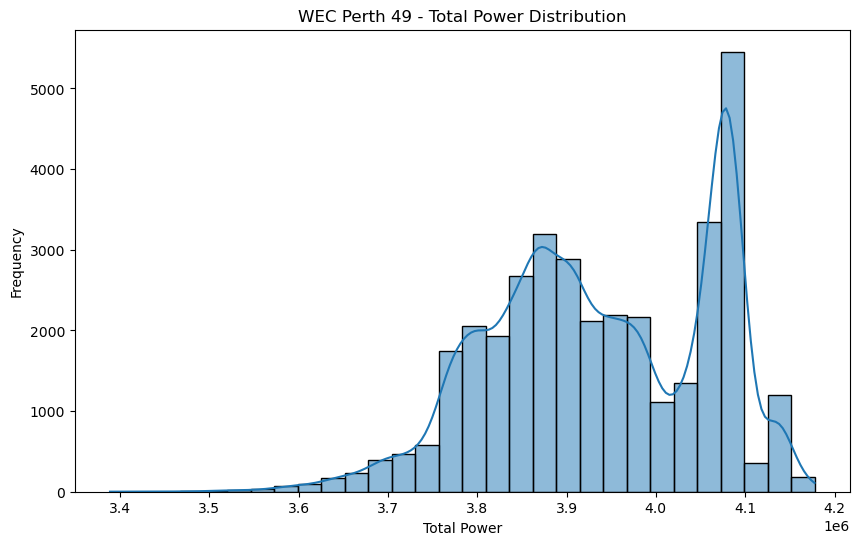

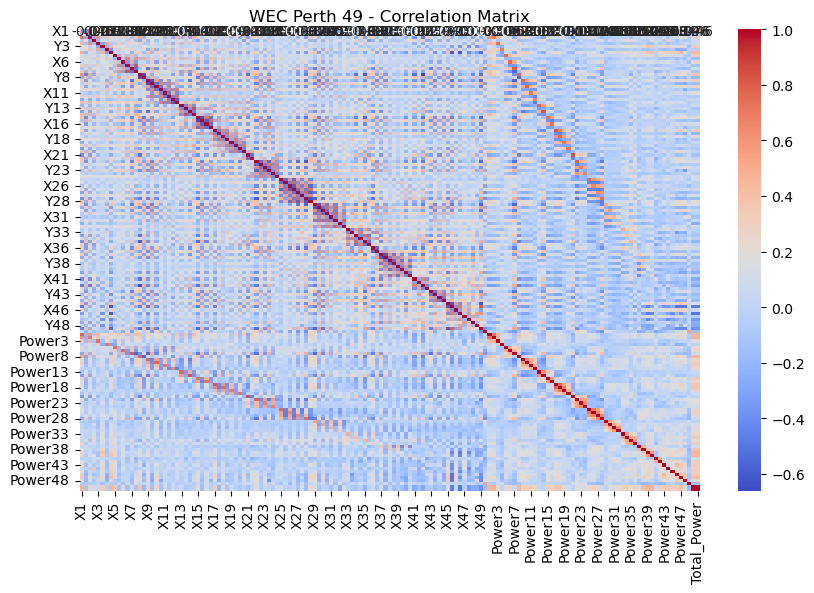

Top 5 features for WEC Perth 49 based on correlation with Total Power:
qW        0.993276
Y46      -0.501744
Y45      -0.484451
Power2    0.477371
Power8    0.469824
Name: Total_Power, dtype: float64


In [20]:
# Function to perform EDA and get top 5 features
def perform_eda(df, title):
    # Histogram for Total Power distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Total_Power'], bins=30, kde=True)
    plt.title(f'{title} - Total Power Distribution')
    plt.xlabel('Total Power')
    plt.ylabel('Frequency')
    plt.show()
    
    # Correlation matrix
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'{title} - Correlation Matrix')
    plt.show()
    
    # Top 5 features
    top_features = corr_matrix['Total_Power'].abs().sort_values(ascending=False).index[1:6]
    top_corr = corr_matrix.loc[top_features, 'Total_Power']
    print(f'Top 5 features for {title} based on correlation with Total Power:')
    print(top_corr)
    return top_features, top_corr

# Perform EDA for each dataset and get top 5 features of perth_49
top_features_perth_49, top_corr_perth_49 = perform_eda(perth_49, 'WEC Perth 49')


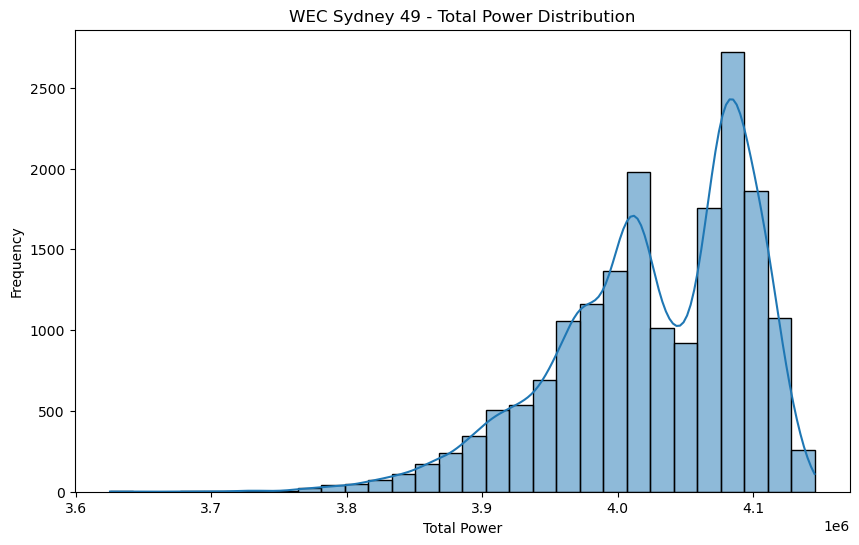

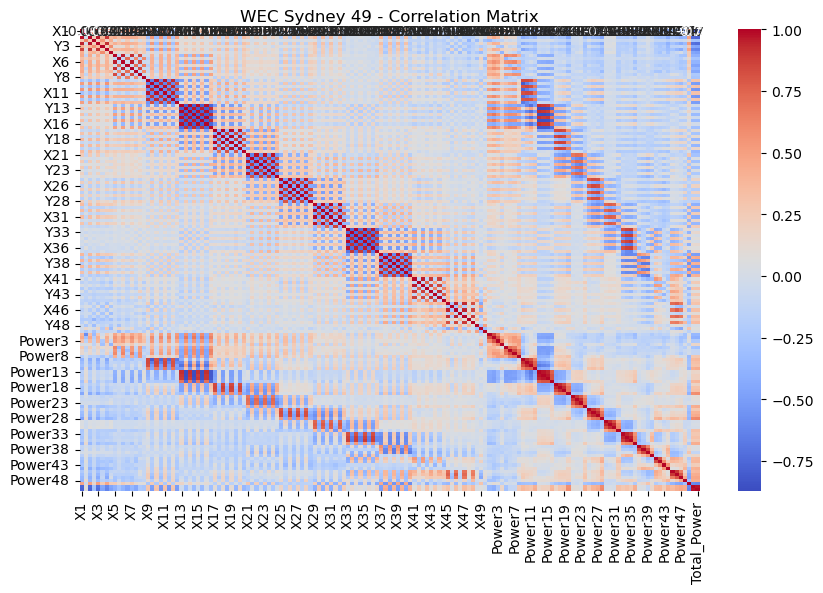

Top 5 features for WEC Sydney 49 based on correlation with Total Power:
qW    0.977025
X1   -0.778356
X2   -0.764671
X3   -0.728198
X4   -0.631557
Name: Total_Power, dtype: float64


In [21]:
# Get top 5 features of sydney_49
top_features_sydney_49, top_corr_sydney_49 = perform_eda(sydney_49, 'WEC Sydney 49')

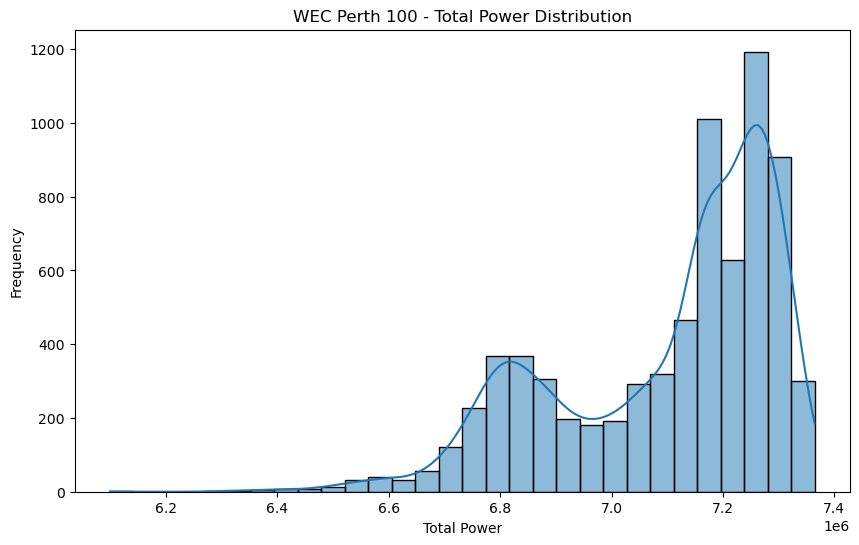

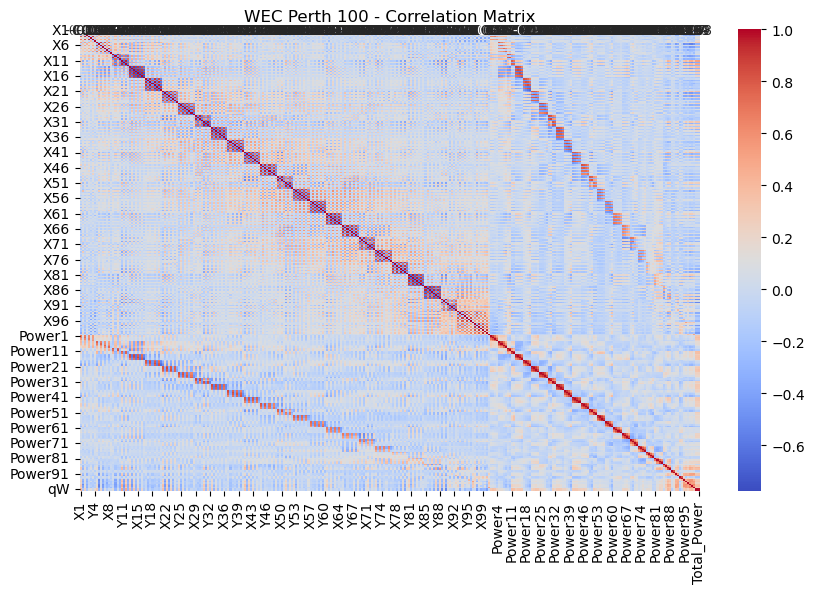

Top 5 features for WEC Perth 100 based on correlation with Total Power:
qW     0.989606
X90   -0.529641
X11    0.523223
X12    0.491014
X89   -0.490657
Name: Total_Power, dtype: float64


In [22]:
# Get top 5 features of perth_100
top_features_perth_100, top_corr_perth_100 = perform_eda(perth_100, 'WEC Perth 100')

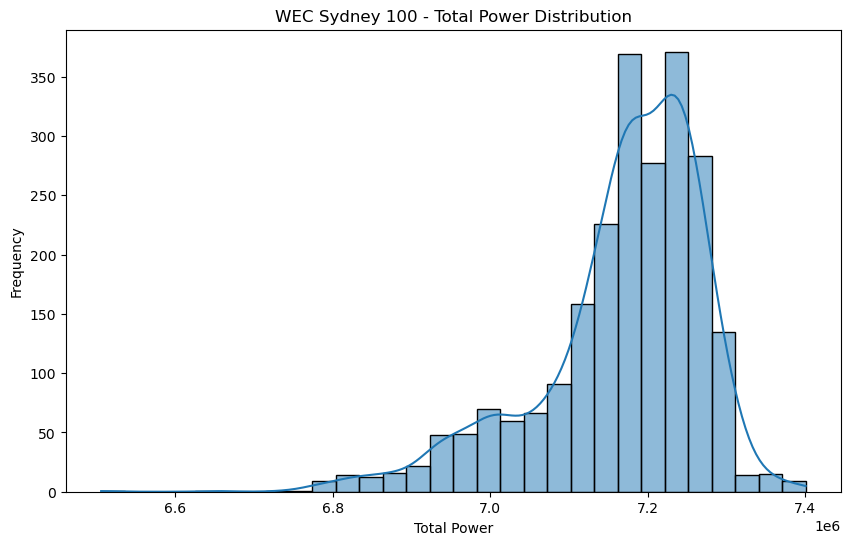

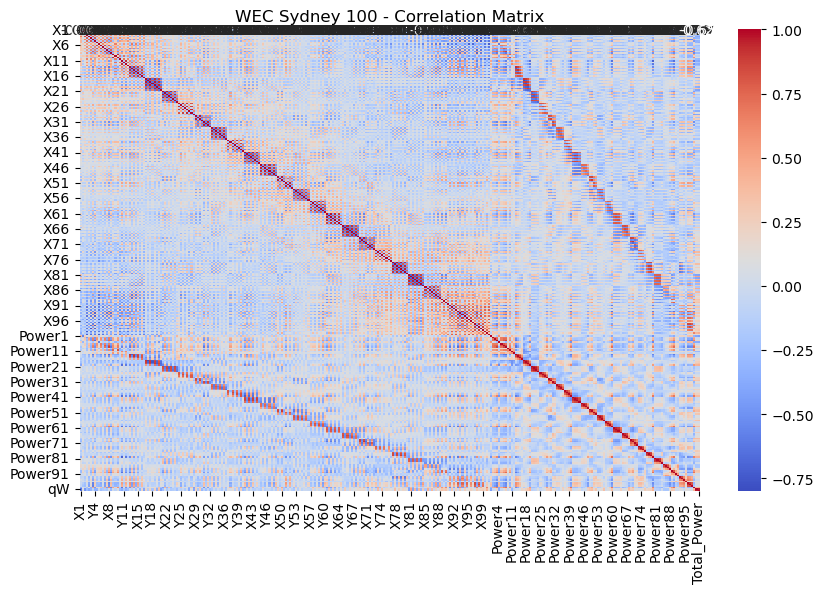

Top 5 features for WEC Sydney 100 based on correlation with Total Power:
qW     0.958786
X1    -0.646574
Y81    0.504853
X2    -0.497733
Y85    0.464786
Name: Total_Power, dtype: float64


In [23]:
# Get top 5 features of sysdney_100
top_features_sydney_100, top_corr_sydney_100 = perform_eda(sydney_100, 'WEC Sydney 100')

In [24]:
# Visualize

# Step 4: Predictive Modeling

In [25]:
# Function to train and evaluate a model
def train_and_evaluate(df, title):
    X = df.drop('Total_Power', axis=1)
    y = df['Total_Power']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{title} - Model Performance:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²) Score: {r2}')
    print('\n')

# Train and evaluate models for perth_49
train_and_evaluate(perth_49, 'WEC Perth 49')

WEC Perth 49 - Model Performance:
Mean Squared Error (MSE): 70643.62130063277
Mean Absolute Error (MAE): 167.03910499200936
Root Mean Squared Error (RMSE): 265.78867790151025
R-squared (R²) Score: 0.9999952067974401




In [26]:
# Train and evaluate models for sydney_49
train_and_evaluate(sydney_49, 'WEC Sydney 49')

WEC Sydney 49 - Model Performance:
Mean Squared Error (MSE): 31257.997843950863
Mean Absolute Error (MAE): 103.57186001240393
Root Mean Squared Error (RMSE): 176.79931516821796
R-squared (R²) Score: 0.99999391649526




In [27]:
# Train and evaluate models for perth_100
train_and_evaluate(perth_100, 'WEC Perth 100')

WEC Perth 100 - Model Performance:
Mean Squared Error (MSE): 5.1946880819811305
Mean Absolute Error (MAE): 0.24402050558377855
Root Mean Squared Error (RMSE): 2.279185837526447
R-squared (R²) Score: 0.9999999998589505




In [28]:
# Train and evaluate models for sydney_100
train_and_evaluate(sydney_100, 'WEC Sydney 100')

WEC Sydney 100 - Model Performance:
Mean Squared Error (MSE): 178464.49458010678
Mean Absolute Error (MAE): 142.12379179250223
Root Mean Squared Error (RMSE): 422.45058241184466
R-squared (R²) Score: 0.9999817374183911




### Exploratory Data Analysis (EDA)

#### Descriptive Analytics
We start with basic statistics and visualizations to understand the distribution and relationships within the data.



## Conclusion

This project successfully developed a surrogate model to predict the power output of large-scale wave energy farms. Through data exploration, cleaning, and the application of machine learning techniques, the model achieved significant accuracy, providing valuable insights into optimizing wave farm configurations. Future work may involve exploring more advanced models and incorporating additional environmental variables to further enhance prediction accuracy.

## References

- Neshat, M., Alexander, B., Sergiienko, N., & Wagner, M. (2023). Large-scale Wave Energy Farm. UCI Machine Learning Repository. [DOI: 10.24432/C5GG7Q](https://doi.org/10.24432/C5GG7Q)
- Neshat, M., Alexander, B., Sergiienko, N., & Wagner, M. (2020). Optimisation of large wave farms using a multi-strategy evolutionary framework. In Proceedings of the 2020 Genetic and Evolutionary Computation Conference, pp. 1150-1158.